In [1]:
from IPython.display import HTML

HTML("""
<style>
div.text_cell_render {
    font-size: 11px !important;
    line-height: 1.2;
}

div.input_area pre {
    font-size: 7px !important;
}
div.highlight pre {
    font-size: 7px !important;
}

div.output_area pre,
div.output pre,
pre {
    font-size: 6px !important;
    line-height: 1 !important;
    white-space: pre-wrap !important;  /* optional: wraps long lines */
}
.jp-CodeCell .jp-InputPrompt,
div.prompt.input_prompt {
    font-size: 6px !important;
    padding-right: 2px !important;
    color: #888 !important;
}

.jp-OutputPrompt,
div.prompt.output_prompt {
    font-size: 6px !important;
    padding-right: 2px !important;
    color: #888 !important;
}
</style>
""")

## Problem Statement ##
Construct a mathematical model that uses linear regression on 3 features (sleep quality, length of physical activity, and stress level) to predict the duration of sleeping.
## Variables and Parameters ##
|         Description         |   Symbol   |    Dimension    |         Type         |
|:---------------------------:|:----------:|:---------------:|:--------------------:|
| Duration of Sleeping| $Y$|-| Variable
|        Sleep Quality        |   $X_1$    |        -        |Variable |
| Length of Physical Activity |   $X_2$    |     -      |Variable |
|        Stress Level         |   $X_3$    |        -       |  Variable |
|  Regression Coefficent for Intercept  | $\beta _0$ |        -       | Parameter    |
| Regression Coefficent for Sleep Quality| $\beta _1$ |       -      |    Parameter    |
| Regression Coefficient for Length of Physical Activity| $\beta _2$ | - |    Parameter    |
| Regression Coefficient for Stress Level | $\beta _3$ |       -       |    Parameter    |
|Error|$\epsilon$|-| Variable|
## Assumptions and Constraints ##

## Build the Solution ##

Build the linear regression: $\ln (Y) = \beta_0+ \beta_1 \ln (X_1)+\beta_2 X_2+\beta_3X_3+\epsilon$

In [40]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [3]:
## define the inputs and outputs for the regression
sleep_df = pd.read_csv("../data/Sleep.csv")
X = sleep_df[["Quality", "Physical_Activity", "Stress"]]
Y = sleep_df["Duration"]

In [4]:
## transform the data as stated before
Y_log = np.log(Y)
Quality_log = np.zeros(len(sleep_df["Quality"]))
for i in range(len(sleep_df["Quality"])):
    Quality_log[i] = np.log(sleep_df["Quality"][i])
sleep_df["Quality Log"] = Quality_log
X_transformed = sleep_df[["Quality Log", "Physical_Activity", "Stress"]]

In [5]:
X_logged = sm.add_constant(X_transformed)
reg_logged = sm.OLS(Y_log, X_logged).fit()
summary_table_logged = reg_logged.summary()
print(summary_table_logged)

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     420.3
Date:                Wed, 26 Nov 2025   Prob (F-statistic):          8.92e-119
Time:                        21:35:26   Log-Likelihood:                 565.18
No. Observations:                 374   AIC:                            -1122.
Df Residuals:                     370   BIC:                            -1107.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2445      0.08

The linear model is $\ln(\hat{Y}) = 1.2445 + 0.3963\cdot \ln(X_1) + 0.0004\cdot X_2 - 0.0177\cdot X_3$, which can be written as $\hat{Y} = e^{1.2445}\cdot X_1^{0.3963}\cdot e^{0.0004 X_2}\cdot e^{-0.0177X_3}$.

In [6]:
results = {}
results["The transformed model"] = {
    "R-squared": 0.773,
    "Adjusted R-squared": 0.771
}
pd.DataFrame(results).T

,R-squared,Adjusted R-squared
The transformed model,0.773,0.771


## Analyze and Assess ##

We chose this linear regression model because it violates the least assumptions of linear regression. In the later part, we will compare our linear regression model with the regular linear regression model.
have a lot of assumptions on the error of the linear regression.  To check these, we will produce the diagnostic plots.

Regular Linear Regression $Y=\beta _0 + \beta _1 X_1 +\beta _2 X_2 + \beta _3 X_3$

In [7]:
X = sm.add_constant(X)
reg_original = sm.OLS(Y,X).fit()
summary_table=reg_original.summary()
print(summary_table)

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     450.5
Date:                Wed, 26 Nov 2025   Prob (F-statistic):          4.13e-123
Time:                        21:35:26   Log-Likelihood:                -157.20
No. Observations:                 374   AIC:                             322.4
Df Residuals:                     370   BIC:                             338.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.6737      0.40

In [ ]:
results["Regular linear regression"] = {
    "R-squared": 0.785,
    "Adjusted R-squared": 0.783
}
pd.DataFrame(results).T

,R-squared,Adjusted R-squared
The transformed model,0.773,0.771
Regular linear regression,0.785,0.783


We see that after we do the transformation, both the R squared and Adjusted R squared score decreased, but the transformed model satisfies more assumptions of linear regression.

TODO:
Firstly, average value of the error is zero. \
The residual - covariate plot of both the transformed model and the regular linear regression model show random scatter, but both of their partial regression plots are not showing linear relationship.

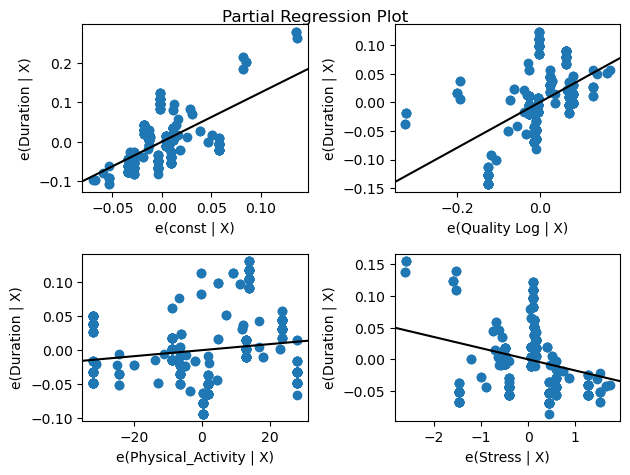

In [46]:
sm.graphics.plot_partregress_grid(reg_logged)
plt.show()

Secondly, our logged model satisfies the assumption variance of the error is constant better than the regular model. The regular model has more points under the line $y = 0$. Even though the transformed model is also not showing a perfect random scatter, it improves.

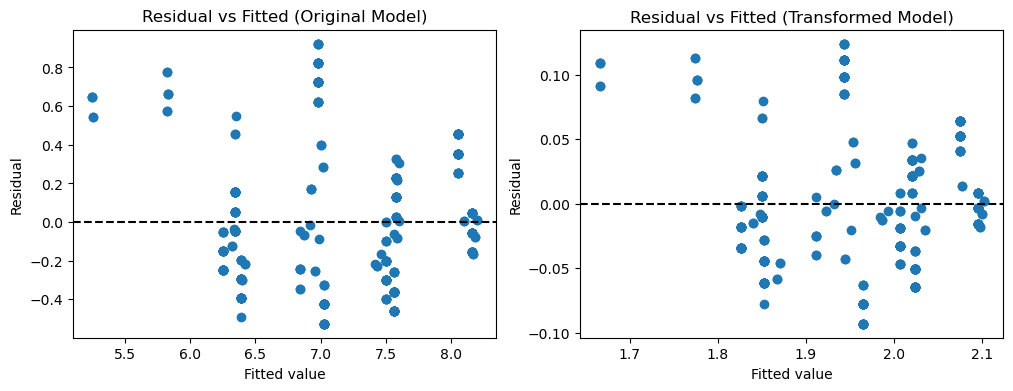

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fitted_y = reg_original.fittedvalues
residuals = reg_original.resid
fitted_y_log = reg_logged.fittedvalues
residuals_log = reg_logged.resid
axes[0].scatter(fitted_y, residuals)
axes[0].axhline(y=0, color='k', linestyle='--')
axes[0].set_xlabel('Fitted value')
axes[0].set_ylabel('Residual')
axes[0].set_title('Residual vs Fitted (Regular Model)')

axes[1].scatter(fitted_y_log,residuals_log)
axes[1].axhline(y=0, color='k', linestyle='--')
axes[1].set_xlabel('Fitted value')
axes[1].set_ylabel('Residual')
axes[1].set_title('Residual vs Fitted (Transformed Model)')
plt.show()

For the assumption: the error $\vec{\epsilon}$ is a random sample from the normal distribution of zero mean and variance $\sigma^2$, we observe that the QQplot of the transformed model has more points lying on the line $y = x$.

Text(0.5, 1.0, 'Transformed model')

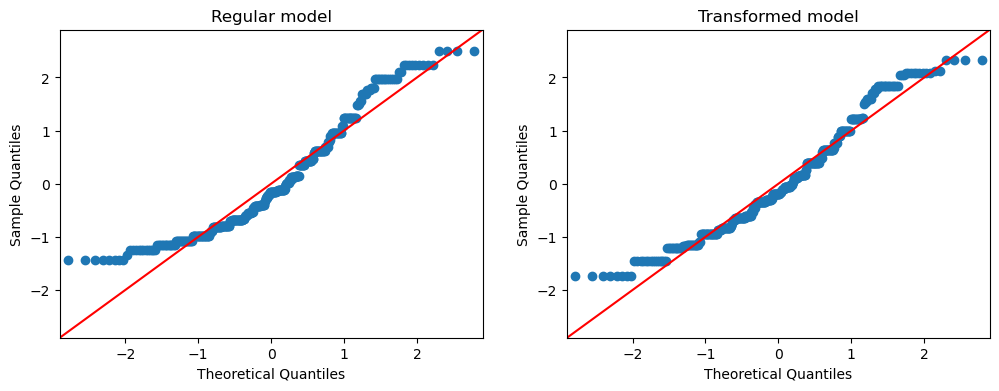

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.qqplot(residuals, fit=True, line="45", ax=axes[0])
axes[0].set_title('Regular model')

sm.qqplot(residuals_log, fit=True, line="45", ax=axes[1])
axes[1].set_title('Transformed model')

### Limitation of our model
1. Multicolinearity
2. Different range of covariate.

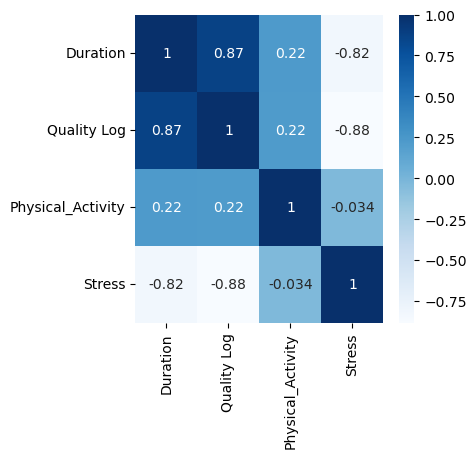

In [41]:
cor = pd.concat((Y_log, X_transformed), axis=1).corr()
plt.figure(figsize=(4, 4))
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

In [42]:
X_transformed.describe().loc[['min', '25%', '50%', '75%', 'max']]

,Quality Log,Physical_Activity,Stress
min,1.386294,30.0,3.0
25%,1.791759,45.0,4.0
50%,1.945910,60.0,5.0
75%,2.079442,75.0,7.0
max,2.197225,90.0,8.0


TODO: Explain the relationship between the covariates and the target. Also, the colinearity ones. Need to do literature research.